<a href="https://www.kaggle.com/code/dzulfikrialwi/perfomance-stat-of-top-5-leagues-2025-young-player?scriptVersionId=248245001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# 1. Import & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn")
sns.set(font_scale=1.1)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/all-football-players-stats-in-top-5-leagues-2425/top5-players24-25.xlsx


# Load Data

In [2]:
#Load data
PATH = '/kaggle/input/all-football-players-stats-in-top-5-leagues-2425/top5-players24-25.xlsx'
df = pd.read_excel(PATH)
df.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


# Cleaning data

In [3]:
#Check missing values
print("\n--- Total Missing Values on All Dataset ---")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"Total nilai hilang: {total_missing}")
else:
    print("No missing value on dataset.")

print("\n--- Missing Values per columns (if any) ---")
missing_per_column = df.isnull().sum()
missing_per_column = missing_per_column[missing_per_column > 0]
if not missing_per_column.empty:
    print(missing_per_column)
else:
    print("No missing value per columns.")


--- Total Missing Values on All Dataset ---
Total nilai hilang: 23

--- Missing Values per columns (if any) ---
Nation    7
Age       8
Born      8
dtype: int64


In [4]:
#Check duplicate value
print("\n--- Total Duplicate Values on All Dataset ---")
total_duplicate = df.duplicated().sum().sum()
if total_missing > 0:
    print(f"Total duplicate value: {total_duplicate}")
else:
    print("No duplicate value on dataset.")


--- Total Duplicate Values on All Dataset ---
Total duplicate value: 0


In [5]:
#The missing values
missing_rows = df[df['Nation'].isnull() | df['Age'].isnull() | df['Born'].isnull()][['Player', 'Squad','Nation', 'Age', 'Born']]
print(missing_rows)

                   Player           Squad  Nation   Age    Born
100         Olabade Aluko  Leicester City     NaN   NaN     NaN
273        Hannes Behrens      Hoffenheim  de GER   NaN     NaN
663   Pape Daouda Diongue      Strasbourg  sn SEN   NaN     NaN
862            Jake Evans  Leicester City     NaN   NaN     NaN
1320       Atakan Karazor       Stuttgart     NaN  27.0  1996.0
1518            Fer López      Celta Vigo     NaN   NaN     NaN
1603          Mateus Mane          Wolves     NaN   NaN     NaN
1769        Max Moerstedt      Hoffenheim  de GER   NaN     NaN
1778         Jeremy Monga  Leicester City     NaN   NaN     NaN
1917       Plamedi Nsingi          Nantes     NaN  23.0  2000.0


In [6]:
df_cleaned = df.dropna()

In [7]:
print("\n--- Missing Values per columns (if any) ---")
missing_per_column = df_cleaned.isnull().sum()
missing_per_column = missing_per_column[missing_per_column > 0]
if not missing_per_column.empty:
    print(missing_per_column)
else:
    print("No missing value per columns.")


--- Missing Values per columns (if any) ---
No missing value per columns.


## 📊 Data Overview

Tampilkan beberapa baris pertama dan informasi dataset.

- Jumlah pemain
- Rata-rata usia
- Cek missing values

In [8]:
df_cleaned.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 0 to 2853
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2844 non-null   int64  
 1   Player       2844 non-null   object 
 2   Nation       2844 non-null   object 
 3   Pos          2844 non-null   object 
 4   Squad        2844 non-null   object 
 5   Comp         2844 non-null   object 
 6   Age          2844 non-null   float64
 7   Born         2844 non-null   float64
 8   MP           2844 non-null   int64  
 9   Starts       2844 non-null   int64  
 10  Min          2844 non-null   int64  
 11  90s          2844 non-null   float64
 12  Gls          2844 non-null   int64  
 13  Ast          2844 non-null   int64  
 14  G+A          2844 non-null   int64  
 15  G-PK         2844 non-null   int64  
 16  PK           2844 non-null   int64  
 17  PKatt        2844 non-null   int64  
 18  CrdY         2844 non-null   int64  
 19  CrdR       

In [10]:
df_cleaned.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,...,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000
mean,1428.365682,25.018987,1998.637482,19.061181,13.537271,1215.077707,13.500141,1.688115,1.204290,2.892405,...,0.112032,0.076909,0.188949,0.104434,0.181357,0.135591,0.088878,0.224272,0.127690,0.216428
std,824.506208,4.492890,4.499159,11.499917,11.324974,965.234586,10.725007,3.160629,1.948538,4.538927,...,0.196378,0.136747,0.264578,0.186588,0.253648,0.218226,0.124636,0.272760,0.209537,0.263716
min,1.000000,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,714.750000,22.000000,1996.000000,9.000000,3.000000,320.750000,3.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.047500,0.010000,0.040000
50%,1427.500000,25.000000,1999.000000,20.000000,11.000000,1059.000000,11.800000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.080000,0.000000,0.080000,0.060000,0.060000,0.140000,0.060000,0.140000
75%,2143.250000,28.000000,2002.000000,30.000000,23.000000,1999.500000,22.200000,2.000000,2.000000,4.000000,...,0.160000,0.120000,0.290000,0.142500,0.280000,0.180000,0.130000,0.330000,0.170000,0.320000
max,2854.000000,41.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,31.000000,18.000000,47.000000,...,2.430000,2.650000,2.650000,2.430000,2.650000,5.060000,2.470000,5.060000,5.060000,5.060000


In [11]:
print("Jumlah pemain:", df_cleaned.shape[0])
print("Rata-rata usia:", round(df_cleaned['Age'].mean(), 2))
print("Total goal:", df_cleaned['Gls'].sum())

Jumlah pemain: 2844
Rata-rata usia: 25.02
Total goal: 4801


## 🧍 Pemain & Posisi

Distribusi posisi dan usia pemain.

In [12]:
def normalize_position(pos):
    parts = pos.split(',')
    parts = sorted([p.strip() for p in parts])
    return ",".join(parts)

# Terapkan ke kolom posisi
df_cleaned['NormalizedPos'] = df_cleaned['Pos'].apply(normalize_position)

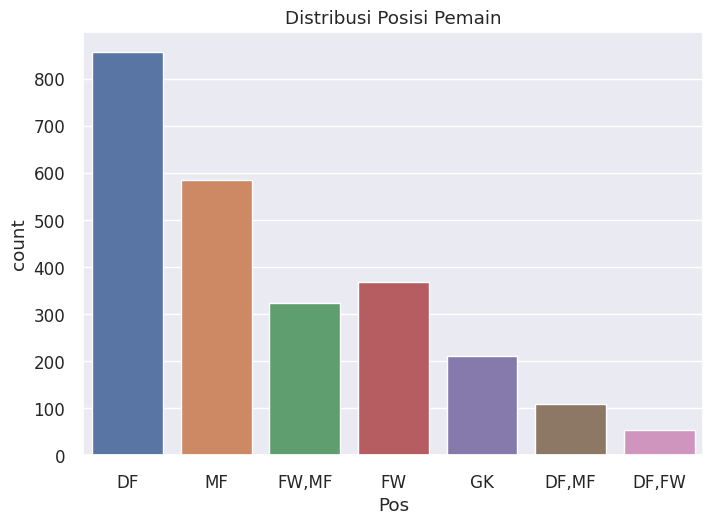

In [13]:
sns.countplot(data=df_cleaned, x='Pos', order=df_cleaned['NormalizedPos'].value_counts().index)
plt.title("Distribusi Posisi Pemain")
plt.show()

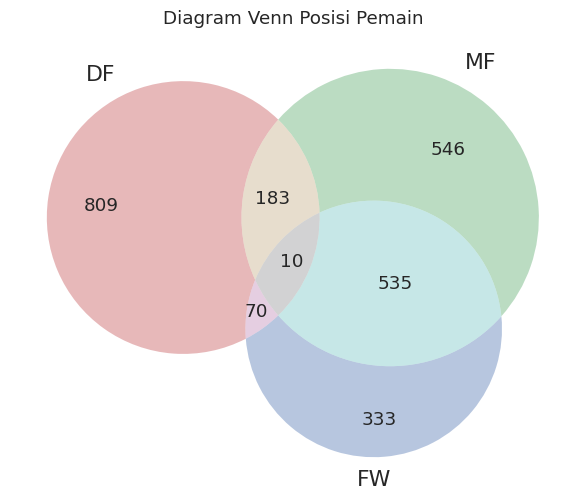

In [14]:
# Buat set pemain untuk tiap posisi
df_cleaned['PlayerID'] = df_cleaned['Player'] + " (" + df_cleaned['Nation'] + ")"

df_pos = df_cleaned[['PlayerID', 'NormalizedPos']]

df_set = {
    'DF': set(df_pos[df_pos['NormalizedPos'].str.contains('DF')]['PlayerID']),
    'MF': set(df_pos[df_pos['NormalizedPos'].str.contains('MF')]['PlayerID']),
    'FW': set(df_pos[df_pos['NormalizedPos'].str.contains('FW')]['PlayerID']),
}

from matplotlib_venn import venn3

plt.figure(figsize=(8,6))
venn3([df_set['DF'], df_set['MF'], df_set['FW']], 
      set_labels=('DF', 'MF', 'FW'))

plt.title("Diagram Venn Posisi Pemain")
plt.show()

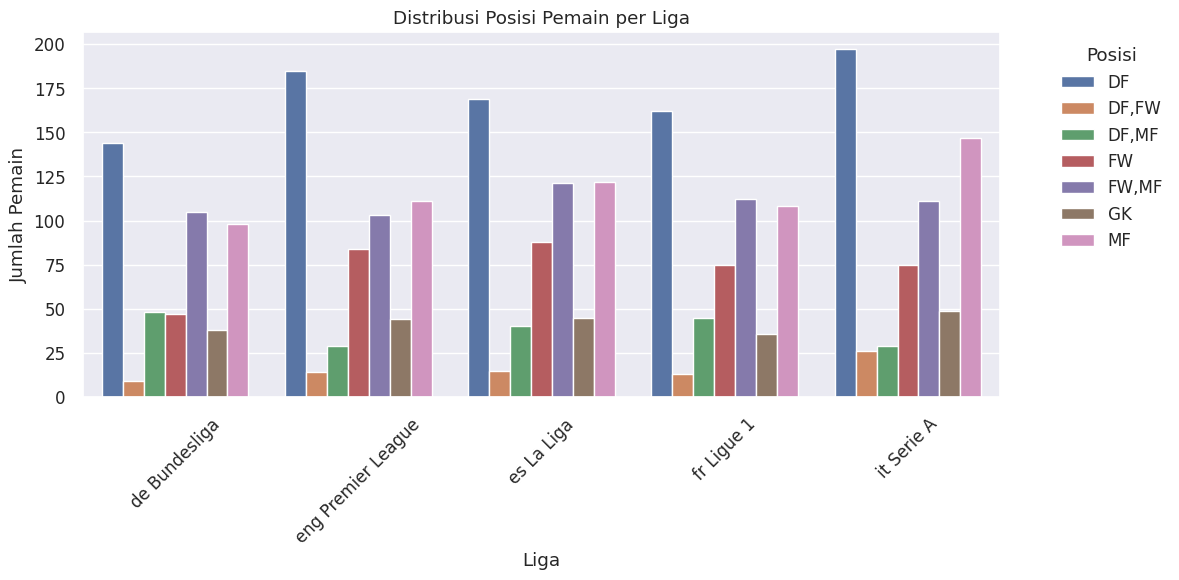

In [15]:
# Hitung jumlah pemain per kombinasi liga dan posisi
position_counts = df_cleaned.groupby(['Comp', 'NormalizedPos']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=position_counts, x='Comp', y='Count', hue='NormalizedPos')

plt.title("Distribusi Posisi Pemain per Liga")
plt.xlabel("Liga")
plt.ylabel("Jumlah Pemain")
plt.legend(title='Posisi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🏃‍♂️Young Players Stat

In [16]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Hitung mean & median
mean_age = df_cleaned['Age'].mean()
median_age = df_cleaned['Age'].median()

# Buat histogram
fig = px.histogram(
    df_cleaned,
    x="Age",
    nbins=20,
    marginal="rug",  # garis kecil di bawah
    opacity=0.75,
    color_discrete_sequence=['dodgerblue'],
    title="Distribusi Usia Pemain (Seluruh Liga)"
)

# Tambahkan garis mean
fig.add_vline(
    x=mean_age,
    line_dash="dash",
    line_color="green",
    annotation_text=f"Mean: {mean_age:.2f}",
    annotation_position="top left"
)

# Tambahkan garis median
fig.add_vline(
    x=median_age,
    line_dash="dot",
    line_color="red",
    annotation_text=f"Median: {median_age:.2f}",
    annotation_position="top right"
)

fig.update_layout(title_x=0.5)
fig.show()

In [17]:
# 1. Ambil 6 liga paling umum
leagues = df_cleaned['Comp'].value_counts().head(6).index.tolist()

# 2. Buat subplot 2 baris × 3 kolom
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=leagues,
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# 3. Loop tiap liga
for idx, liga in enumerate(leagues):
    row = idx // 3 + 1
    col = idx % 3 + 1
    
    data = df_cleaned[df_cleaned['Comp'] == liga]
    mean_age = data['Age'].mean()
    median_age = data['Age'].median()

    # Histogram
    fig.add_trace(go.Histogram(
        x=data['Age'],
        nbinsx=20,
        marker_color='dodgerblue',
        opacity=0.75,
        name=liga,
        showlegend=False
    ), row=row, col=col)

    # Garis mean
    fig.add_vline(
        x=mean_age, line_dash='dash', line_color='green',
        row=row, col=col,
        annotation_text=f"Mean: {mean_age:.1f}",
        annotation_position="top left",
        annotation_font_size=10
    )

    # Garis median
    fig.add_vline(
        x=median_age, line_dash='dot', line_color='red',
        row=row, col=col,
        annotation_text=f"Median: {median_age:.1f}",
        annotation_position="top right",
        annotation_font_size=10
    )

# 4. Layout
fig.update_layout(
    height=650,
    width=1000,
    title="Distribusi Usia Pemain per Liga (dengan Mean & Median)",
    title_x=0.5,
    bargap=0.05
)

fig.update_xaxes(title_text="Usia")
fig.update_yaxes(title_text="Jumlah Pemain")

fig.show()

In [18]:
youngest_player = df_cleaned.sort_values('Age', ascending=True).reset_index().head(10)
print(youngest_player[['Player', 'Age','Squad','Comp', 'Pos', 'Min']])


age_threshold = 21

              Player   Age          Squad                Comp    Pos   Min
0       Harry Howell  15.0       Brighton  eng Premier League     FW     7
1  Djylian N'Guessan  15.0  Saint-Étienne          fr Ligue 1     FW   181
2        Mikey Moore  16.0      Tottenham  eng Premier League     FW   366
3     Ayyoub Bouaddi  16.0          Lille          fr Ligue 1     MF  1151
4      Mohamed Meité  16.0         Rennes          fr Ligue 1     FW   544
5         Faik Sakar  16.0     RB Leipzig       de Bundesliga     MF     1
6    Kyllian Antonio  16.0           Lens          fr Ligue 1  DF,MF   139
7       David Otorbi  16.0       Valencia          es La Liga     MF    14
8        Viggo Gebel  16.0     RB Leipzig       de Bundesliga     MF    14
9      Ibrahim Mbaye  16.0      Paris S-G          fr Ligue 1  FW,MF   340


In [19]:
# Top 3 pemain termuda per liga
youngest_players_per_liga = (
    df_cleaned.sort_values('Age')
    .groupby('Comp')
    .head(3)
    .reset_index(drop=True)
)

print(youngest_players_per_liga[['Player', 'Age', 'Squad', 'Comp', 'Pos', 'Min']].sort_values('Comp'))

                Player   Age          Squad                Comp    Pos   Min
5           Faik Sakar  16.0     RB Leipzig       de Bundesliga     MF     1
7          Viggo Gebel  16.0     RB Leipzig       de Bundesliga     MF    14
12   Kacper Koscierski  17.0         Bochum       de Bundesliga     DF     7
0         Harry Howell  15.0       Brighton  eng Premier League     FW     7
2          Mikey Moore  16.0      Tottenham  eng Premier League     FW   366
11     Shumaira Mheuka  16.0        Chelsea  eng Premier League     MF     1
6         David Otorbi  16.0       Valencia          es La Liga     MF    14
13         Héctor Fort  17.0      Barcelona          es La Liga     DF   585
14    Arturo Rodríguez  17.0     Las Palmas          es La Liga     FW    21
1    Djylian N'Guessan  15.0  Saint-Étienne          fr Ligue 1     FW   181
3       Ayyoub Bouaddi  16.0          Lille          fr Ligue 1     MF  1151
4        Mohamed Meité  16.0         Rennes          fr Ligue 1     FW   544

In [20]:
# Hitung jumlah pemain muda per klub
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]
young_players_per_liga = young_players[['Comp']].value_counts().head(5)

# Tampilkan hasil
print(young_players_per_liga)

young_players_per_comp = young_players['Comp'].value_counts().head(5).reset_index()
young_players_per_comp.columns = ['Comp', 'Jumlah Pemain Muda']

fig = px.bar(
    young_players_per_comp,
    x='Jumlah Pemain Muda',
    y='Comp',
    orientation='h',
    color='Jumlah Pemain Muda',
    color_continuous_scale='YlGnBu',
    title='Jumlah Pemain Muda per Liga (< 21 Tahun)'
)

fig.update_layout(
    xaxis_title="Jumlah Pemain Muda",
    yaxis_title="Liga",
    yaxis=dict(autorange='reversed'),  # supaya bar terbesar di atas
    title_x=0.5
)

fig.show()

Comp              
fr Ligue 1            183
es La Liga            152
it Serie A            132
eng Premier League    127
de Bundesliga          98
Name: count, dtype: int64


In [21]:
# Hitung jumlah pemain muda per klub
young_players_per_club = young_players[['Squad', 'Comp']].value_counts().head(5)

# Tampilkan hasil
print(young_players_per_club)

young_players_per_club = young_players['Squad'].value_counts().head(5).reset_index()
young_players_per_club.columns = ['Squad', 'Jumlah Pemain Muda']

fig = px.bar(
    young_players_per_club,
    x='Jumlah Pemain Muda',
    y='Squad',
    orientation='h',
    color='Jumlah Pemain Muda',
    color_continuous_scale='viridis',
    title='Top 5 Klub dengan Jumlah Pemain Muda Terbanyak (< 21 Tahun)'
)

fig.update_layout(
    xaxis_title="Jumlah Pemain Muda",
    yaxis_title="Klub",
    yaxis=dict(autorange='reversed'),  # supaya bar terbesar di atas
    title_x=0.5
)

fig.show()

Squad        Comp      
Reims        fr Ligue 1    18
Strasbourg   fr Ligue 1    18
Montpellier  fr Ligue 1    14
Valladolid   es La Liga    13
Barcelona    es La Liga    13
Name: count, dtype: int64


In [22]:
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]

# Total pemain per klub
total_per_club = df_cleaned['Squad'].value_counts().reset_index()
total_per_club.columns = ['Squad', 'Total Pemain']

# Pemain muda per klub
young_per_club = young_players['Squad'].value_counts().reset_index()
young_per_club.columns = ['Squad', 'Pemain Muda']

# Gabungkan dua data
proporsi_df = pd.merge(total_per_club, young_per_club, on='Squad', how='left')
proporsi_df['Pemain Muda'] = proporsi_df['Pemain Muda'].fillna(0)

# Hitung proporsi
proporsi_df['Proporsi Muda (%)'] = 100 * proporsi_df['Pemain Muda'] / proporsi_df['Total Pemain']


top_proporsi = proporsi_df.sort_values('Proporsi Muda (%)', ascending=False).head(10)


fig = px.bar(
    top_proporsi,
    x='Proporsi Muda (%)',
    y='Squad',
    orientation='h',
    color='Proporsi Muda (%)',
    color_continuous_scale='sunsetdark',
    title='Top 10 Klub dengan Proporsi Pemain Muda Tertinggi'
)

fig.update_layout(
    xaxis_title="Proporsi Pemain Muda (%)",
    yaxis_title="Klub",
    yaxis=dict(autorange='reversed'),
    title_x=0.5
)

fig.show()

## ⏱ Young Players Playing Minutes

In [23]:
avg_minutes_young = young_players['Min'].mean()
print(f"Rata-rata menit bermain pemain muda (≤ {age_threshold:.1f} tahun): {avg_minutes_young:.2f} menit")

avg_min_per_league = young_players.groupby('Comp')['Min'].mean().round(2).sort_values(ascending=False)
print(avg_min_per_league)

fig = px.bar(
    avg_min_per_league.reset_index(),
    x='Min',
    y='Comp',
    orientation='h',
    text='Min',
    color = 'Min',
    color_continuous_scale = 'Emrld',
    title='Rata-rata Menit Bermain Pemain Muda per Liga'
)

fig.update_layout(
    yaxis=dict(title='Liga'),
    xaxis=dict(title='Rata-rata Menit'),
    yaxis_autorange='reversed',
    title_x=0.5
)

fig.show()

Rata-rata menit bermain pemain muda (≤ 21.0 tahun): 688.67 menit
Comp
eng Premier League    746.83
de Bundesliga         702.61
es La Liga            692.19
fr Ligue 1            684.65
it Serie A            623.90
Name: Min, dtype: float64


In [24]:
avg_min_per_club = young_players.groupby('Squad')['Min'].mean().round(2).sort_values(ascending=False)

fig = px.bar(
    avg_min_per_club.head(10).reset_index(),
    x='Min',
    y='Squad',
    orientation='h',
    color = 'Min',
    color_continuous_scale='inferno_r',
    text='Min',
    title='Top 10 Klub dengan Rata-rata Menit Bermain Pemain Muda Tertinggi'
)

fig.update_layout(
    yaxis=dict(title='Klub'),
    xaxis=dict(title='Rata-rata Menit'),
    yaxis_autorange='reversed',
    title_x=0.5
)

fig.show()

In [25]:
# Filter pemain muda
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]

# Ambil 5 pemain muda dengan menit bermain terbanyak
top_10_min_play_young_player = (
    young_players[['Player', 'Min', 'Age', 'Squad', 'Comp']]
    .sort_values('Min', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print(top_10_min_play_young_player)

fig = px.bar(
    top_10_min_play_young_player,
    x='Min',
    y='Player',
    orientation='h',
    color='Min',
    color_continuous_scale = 'bupu',
    text='Min',
    title='Top 10 Pemain Muda dengan Menit Bermain Terbanyak'
)
fig.update_layout(yaxis=dict(autorange='reversed'), title_x=0.5)
fig.show()

               Player   Min   Age          Squad                Comp
0        Milos Kerkez  3336  20.0    Bournemouth  eng Premier League
1  Cristhian Mosquera  3319  20.0       Valencia          es La Liga
2         Zion Suzuki  3314  21.0          Parma          it Serie A
3     Bart Verbruggen  3240  21.0       Brighton  eng Premier League
4      Omar El Hilali  3153  20.0       Espanyol          es La Liga
5        Levi Colwill  3149  21.0        Chelsea  eng Premier League
6      Illia Zabarnyi  3109  21.0    Bournemouth  eng Premier League
7       Diego Coppola  2927  20.0  Hellas Verona          it Serie A
8    Mateus Fernandes  2909  20.0    Southampton  eng Premier League
9               Pedri  2879  21.0      Barcelona          es La Liga


In [26]:
# Filter pemain muda dan ambil 10 teratas berdasarkan menit bermain
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()
compare_minutes = (
    young_players[['Player', 'Min', '90s', 'Squad', 'Comp']]
    .sort_values('Min', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Buat Figure
fig = go.Figure()

# Bar 1: Total Menit
fig.add_trace(go.Bar(
    x=compare_minutes['Player'],
    y=compare_minutes['Min'],
    name='Total Menit',
    marker_color='#1f77b4'  # Biru
))

# Bar 2: Total dari 90s (dikembalikan ke menit)
fig.add_trace(go.Bar(
    x=compare_minutes['Player'],
    y=compare_minutes['90s'] * 90,
    name='(90s × 90 menit)',
    marker_color='#ff7f0e'  # Oranye
))

# Layout
fig.update_layout(
    barmode='group',
    title='Perbandingan Total Menit vs 90s (Pemain Muda)',
    xaxis_title='Pemain',
    yaxis_title='Menit Bermain',
    title_x=0.5,
    legend=dict(x=0.5, xanchor='center', y=1.1, orientation='h')
)

fig.show()

In [27]:
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()

young_players_played = young_players.sort_values('MP', ascending=False)
young_players_start = young_players.sort_values('Starts', ascending=False)

top_young = young_players.sort_values('MP', ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(x=top_young['Player'], y=top_young['MP'], name='Total Main', marker_color='dodgerblue'))
fig.add_trace(go.Bar(x=top_young['Player'], y=top_young['Starts'], name='Starter', marker_color='orange'))

fig.update_layout(
    barmode='group',
    title='Pemain Muda dengan Jumlah Pertandingan Terbanyak (MP vs Starts)',
    xaxis_title='Pemain',
    yaxis_title='Jumlah Pertandingan',
    title_x=0.5
)
fig.show()

In [28]:
young_players['starter_ratio'] = young_players['Starts'] / young_players['MP']
young_players_filtered = young_players[young_players['MP'] >= 10]  # filter pemain yang cukup sering main
top_starter = young_players_filtered.sort_values('starter_ratio', ascending=False).head(10)

fig = px.bar(
    top_starter,
    x='Player',
    y='starter_ratio',
    color='starter_ratio',
    color_continuous_scale='viridis',
    title='Rasio Starter Pemain Muda (Min 10 MP)',
    labels={'starter_ratio': 'Rasio Starter'},
    hover_data=['Squad', 'MP', 'Starts', '90s']
)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()

In [29]:
starter_by_league = young_players.groupby('Comp')[['MP', 'Starts']].sum()
starter_by_league['Starter Ratio'] = starter_by_league['Starts'] / starter_by_league['MP']
starter_by_league = starter_by_league.sort_values('Starter Ratio', ascending=False).reset_index()

px.bar(
    starter_by_league,
    x='Comp',
    y='Starter Ratio',
    color='Starter Ratio',
    color_continuous_scale='plasma',
    title='Starter Rate Pemain Muda per Liga',
    labels={'Starter Ratio': 'Rasio Starter'}
).show()

## ⚽Young Players Performance

In [30]:
# 2. Filter pemain muda (termuda 5%)
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]

# 3. Hitung total kontribusi
total_goals = df_cleaned['Gls'].sum()
total_assists = df_cleaned['Ast'].sum()
total_ga = df_cleaned['Gls'].add(df_cleaned['Ast']).sum()

young_goals = young_players['Gls'].sum()
young_assists = young_players['Ast'].sum()
young_ga = young_players['Gls'].add(young_players['Ast']).sum()

# 4. Hitung persentasenya
percent_goals = 100 * young_goals / total_goals
percent_assists = 100 * young_assists / total_assists
percent_ga = 100 * young_ga / total_ga

# 5. Cetak hasil
print(f"Usia threshold: ≤ {age_threshold:.2f} tahun")
print(f"Kontribusi Gol oleh pemain termuda: {young_goals} dari {total_goals} ({percent_goals:.2f}%)")
print(f"Kontribusi Assist oleh pemain termuda: {young_assists} dari {total_assists} ({percent_assists:.2f}%)")
print(f"Kontribusi Total G+A oleh pemain termuda: {young_ga} dari {total_ga} ({percent_ga:.2f}%)")

Usia threshold: ≤ 21.00 tahun
Kontribusi Gol oleh pemain termuda: 672 dari 4801 (14.00%)
Kontribusi Assist oleh pemain termuda: 534 dari 3425 (15.59%)
Kontribusi Total G+A oleh pemain termuda: 1206 dari 8226 (14.66%)


In [31]:
# Data kontribusi
goals_data = [young_goals, total_goals - young_goals]
assists_data = [young_assists, total_assists - young_assists]
ga_data = [young_ga, total_ga - young_ga]

labels = ['Pemain Termuda', 'Pemain Lain']
colors = ['#66c2a5', '#fc8d62']

# Buat subplot dengan 3 pie chart
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=["Kontribusi Gol", "Kontribusi Assist", "Kontribusi G+A"]
)

# Tambahkan pie chart satu per satu
fig.add_trace(go.Pie(
    labels=labels,
    values=goals_data,
    name="Gol",
    marker=dict(colors=colors),
    hole=0.5,
    pull=[0.1, 0]  # explode untuk pemain muda
), 1, 1)

fig.add_trace(go.Pie(
    labels=labels,
    values=assists_data,
    name="Assist",
    marker=dict(colors=colors),
    hole=0.5,
    pull=[0.1, 0]
), 1, 2)

fig.add_trace(go.Pie(
    labels=labels,
    values=ga_data,
    name="G+A",
    marker=dict(colors=colors),
    hole=0.5,
    pull=[0.1, 0]
), 1, 3)

# Layout
fig.update_layout(
    title_text="Kontribusi Gol & Assist oleh 5% Pemain Termuda",
    annotations=[dict(text='Gol', x=0.08, y=0.5, font_size=14, showarrow=False),
                 dict(text='Assist', x=0.5, y=0.5, font_size=14, showarrow=False),
                 dict(text='G+A', x=0.91, y=0.5, font_size=14, showarrow=False)]
)

fig.show()

In [32]:
# Data pemain muda top 10 berdasarkan Gls
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].sort_values('Gls', ascending=False)
data = young_players[['Player', 'Gls', 'G-PK', 'PK', 'Age', 'Squad', 'Min']].head(10).reset_index(drop=True)

fig = go.Figure()

# Bar 1: Total Gol (sendiri)
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['Gls'],
    name='Total Gol',
    marker_color='royalblue',
    offsetgroup=0,  # Grup 1
    hovertext=data.apply(lambda row: f"Age: {row['Age']}<br>Squad: {row['Squad']}<br>Min: {row['Min']}", axis=1)
))

# Bar 2: Gol Non-Penalti (bagian bawah stack)
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['G-PK'],
    name='Gol Non-Penalti',
    marker_color='orange',
    offsetgroup=1,  # Grup 2
    base=0
))

# Bar 3: Gol Penalti (stacked di atas non-penalti)
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['PK'],
    name='Gol Penalti',
    marker_color='mediumorchid',
    offsetgroup=1,  # Grup 2 (sama dengan non-pk)
    base=data['G-PK']
))

# Layout
fig.update_layout(
    barmode='group',
    title='Top 10 Pemain Muda: Perbandingan Total Gol vs (Gol Non-Penalti + Penalti)',
    xaxis_title='Pemain',
    yaxis_title='Jumlah Gol',
    title_x=0.5,
    legend=dict(x=0.5, xanchor='center', y=1.1, orientation='h')
)

fig.show()

In [33]:
from plotly.subplots import make_subplots

# 1. Filter pemain muda
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]

# 2. Ambil 6 liga paling umum
leagues = young_players['Comp'].value_counts().head(6).index.tolist()

# 3. Buat subplots 2 baris × 3 kolom
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"{liga}" for liga in leagues],
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# 4. Loop setiap liga dan tambahkan bar chart ke subplot
for idx, liga in enumerate(leagues):
    row = idx // 3 + 1
    col = idx % 3 + 1

    data = young_players[young_players['Comp'] == liga].sort_values('Gls', ascending=False).head(5)

    fig.add_trace(go.Bar(
        x=data['Gls'],
        y=data['Player'],
        orientation='h',
        name=liga,
        marker_color='dodgerblue',
        text=data['Gls'],
        textposition='auto'
    ), row=row, col=col)

    # Balikkan urutan y-axis agar top scorer di atas
    fig.update_yaxes(autorange='reversed', row=row, col=col)

# 5. Layout
fig.update_layout(
    height=600,
    width=1000,
    title_text=f"Top 5 Pencetak Gol Pemain Muda (≤ {age_threshold:.1f} Tahun) di Tiap Liga",
    showlegend=False,
    title_x=0.5
)

fig.show()

In [34]:
# 1. Filter pemain muda
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold]

# 2. Ambil 6 liga paling umum
leagues = young_players['Comp'].value_counts().head(6).index.tolist()

# 3. Subplot 2x3
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"{liga}" for liga in leagues],
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# 4. Tambahkan bar chart untuk setiap liga
for idx, liga in enumerate(leagues):
    row = idx // 3 + 1
    col = idx % 3 + 1

    data = young_players[young_players['Comp'] == liga].sort_values('Ast', ascending=False).head(5)

    fig.add_trace(go.Bar(
        x=data['Ast'],
        y=data['Player'],
        orientation='h',
        name=liga,
        marker_color='mediumseagreen',
        text=data['Ast'],
        textposition='auto'
    ), row=row, col=col)

    fig.update_yaxes(autorange='reversed', row=row, col=col)

# 5. Layout
fig.update_layout(
    height=600,
    width=1000,
    title_text=f"Top 5 Pencetak Assist Pemain Muda (≤ {age_threshold:.1f} Tahun) per Liga",
    showlegend=False,
    title_x=0.5
)

fig.show()

In [35]:
# 1. Filter pemain muda berdasarkan threshold usia
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()

# 2. Tambahkan kolom G+A
young_players['G+A'] = young_players['Gls'] + young_players['Ast']

# 3. Ambil 6 liga paling umum
leagues = young_players['Comp'].value_counts().head(6).index.tolist()

# 4. Buat subplot 2 baris × 3 kolom
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"{liga}" for liga in leagues],
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# 5. Tambahkan bar chart untuk setiap liga
for idx, liga in enumerate(leagues):
    row = idx // 3 + 1
    col = idx % 3 + 1

    data = (
        young_players[young_players['Comp'] == liga]
        .sort_values('G+A', ascending=False)
        .head(5)
    )

    fig.add_trace(go.Bar(
        x=data['G+A'],
        y=data['Player'],
        orientation='h',
        name=liga,
        marker_color='slateblue',
        text=data['G+A'],
        textposition='auto',
        hovertext=[
            f"Gls: {g} | Ast: {a} | Squad: {s}"
            for g, a, s in zip(data['Gls'], data['Ast'], data['Squad'])
        ],
        hoverinfo='text'
    ), row=row, col=col)

    fig.update_yaxes(autorange='reversed', row=row, col=col)

# 6. Layout akhir
fig.update_layout(
    height=650,
    width=1000,
    title_text=f"Top 5 Pemain Muda (≤ {age_threshold:.1f} Tahun) Berdasarkan G+A per Liga",
    showlegend=False,
    title_x=0.5
)

fig.show()

In [36]:
# 1. Tambahkan kolom G+A
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()
young_players['G+A'] = young_players['Gls'] + young_players['Ast']

# 2. Sortir berdasarkan G+A
young_leaderboard = young_players.sort_values('G+A', ascending=False)

# 3. Buat leaderboard interaktif
fig = px.bar(
    young_leaderboard.head(30),  # top 30 saja agar tidak terlalu panjang
    x='G+A',
    y='Player',
    color='Comp',
    orientation='h',
    text='G+A',
    hover_data={
        'Player': True,
        'Gls': True,
        'Ast': True,
        'G+A': True,
        'Age': True,
        'Squad': True,
        'Comp': True
    },
    title=f"Leaderboard Pemain Muda (≤ {age_threshold:.1f} Tahun) Berdasarkan G+A"
)

# 4. Layout
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title="Goals + Assists",
    yaxis_title="Pemain",
    title_x=0.5,
    height=800
)

fig.show()

## ♟Young Players Position

In [37]:
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()
young_pos_counts = young_players['Pos'].value_counts().reset_index()
young_pos_counts.columns = ['Posisi', 'Jumlah Pemain']

print(young_pos_counts)

fig = px.bar(
    young_pos_counts,
    x='Jumlah Pemain',
    y='Posisi',
    orientation='h',
    text='Jumlah Pemain',
    color='Jumlah Pemain',
    color_continuous_scale='matter',
    title='Jumlah Pemain Muda Berdasarkan Posisi'
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    title_x=0.5
)

fig.show()

  Posisi  Jumlah Pemain
0     DF            185
1     MF            159
2     FW             96
3  FW,MF             84
4  MF,FW             74
5  DF,MF             30
6  MF,DF             27
7  DF,FW             15
8     GK             14
9  FW,DF              8


In [38]:
young_players = df_cleaned[df_cleaned['Age'] <= age_threshold].copy()
avg_min_per_pos = young_players.groupby('Pos')['Min'].mean().round(2).sort_values(ascending=False).reset_index()
avg_min_per_pos.columns = ['Posisi', 'Rata-rata Menit']
print(avg_min_per_pos)

fig = px.bar(
    avg_min_per_pos,
    x='Rata-rata Menit',
    y='Posisi',
    orientation='h',
    text='Rata-rata Menit',
    color='Rata-rata Menit',
    color_continuous_scale='viridis',
    title='Rata-rata Menit Bermain Pemain Muda per Posisi'
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    title_x=0.5
)

fig.show()

  Posisi  Rata-rata Menit
0     GK           885.86
1  DF,MF           791.57
2  MF,DF           784.93
3  MF,FW           752.74
4     MF           744.36
5     DF           742.39
6  FW,MF           647.99
7  DF,FW           509.80
8     FW           472.33
9  FW,DF            50.00


In [39]:
# Step 1: Hitung statistik
avg_minutes = young_players.groupby('Pos')['Min'].mean().round(2)
count_players = young_players['Pos'].value_counts().sort_index()

# Gabungkan ke DataFrame
pos_stats = pd.DataFrame({
    'Rata-rata Menit': avg_minutes,
    'Jumlah Pemain': count_players
}).reset_index().rename(columns={'index': 'Pos'})
print(pos_stats)
# Step 2: Buat plot
fig = go.Figure()

# Bar 1: Rata-rata menit bermain
fig.add_trace(go.Bar(
    x=pos_stats['Pos'],
    y=pos_stats['Rata-rata Menit'],
    name='Rata-rata Menit',
    marker_color='royalblue',
    yaxis='y1'
))

# Bar 2: Jumlah pemain
fig.add_trace(go.Bar(
    x=pos_stats['Pos'],
    y=pos_stats['Jumlah Pemain'],
    name='Jumlah Pemain',
    marker_color='orange',
    yaxis='y2'
))

# Step 3: Layout dengan dua sumbu
fig.update_layout(
    title='Rata-rata Menit & Jumlah Pemain Muda per Posisi',
    xaxis_title='Pos',
    yaxis=dict(
        title='Rata-rata Menit',
        titlefont=dict(color='royalblue'),
        tickfont=dict(color='royalblue'),
        side='left'
    ),
    yaxis2=dict(
        title='Jumlah Pemain',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    title_x=0.5,
    legend=dict(x=0.5, xanchor='center', y=1.1, orientation='h')
)

fig.show()

     Pos  Rata-rata Menit  Jumlah Pemain
0     DF           742.39            185
1  DF,FW           509.80             15
2  DF,MF           791.57             30
3     FW           472.33             96
4  FW,DF            50.00              8
5  FW,MF           647.99             84
6     GK           885.86             14
7     MF           744.36            159
8  MF,DF           784.93             27
9  MF,FW           752.74             74


## 🧿Young Player Efficiency

In [40]:
# 1. Filter pemain muda & ambil top 10 pencetak gol
young_players = df_cleaned[(df_cleaned['Age'] <= age_threshold) & (df_cleaned['Gls'] >= 10)].sort_values(['Gls_90', 'Gls'], ascending=False)
data = young_players[['Player', 'Gls', 'Age', 'Squad', 'Gls_90', 'Min']].head(10).reset_index(drop=True)

# 2. Visualisasi
fig = px.bar(
    data,
    x='Player',
    y='Gls_90',
    color='Gls_90',  # gradasi warna berdasarkan efektivitas gol
    color_continuous_scale='viridis',  # atau 'magma', 'plasma', 'cividis'
    hover_data=['Age', 'Squad', 'Min', 'Gls'],
    labels={'Gls_90': 'Gol per 90 Menit'},
    height=400,
    title='Top 10 Pencetak Gol Terefektif (Pemain Muda)',
    text='Gls_90'
)

fig.update_traces(
    texttemplate='%{text:.2f}',  # tampilkan 2 angka di belakang koma
    textposition='outside'
)

fig.update_layout(
    title_x=0.5,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title='Gol per 90 Menit'
)

fig.show()

In [41]:
# 1. Filter dan hitung
young_players = df_cleaned[(df_cleaned['Age'] <= age_threshold) & (df_cleaned['Gls'] >= 10)]
data = young_players[['Player', 'Gls', 'Age', 'Squad', 'xG']].reset_index(drop=True)
data['conv_Gls_xG'] = data['Gls'] / data['xG']
data = data.sort_values('conv_Gls_xG', ascending=False).head(10)

# 2. Plot: bar untuk Gls dan xG, line untuk conv_Gls_xG
fig = go.Figure()

# Bar 1: Goals
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['Gls'],
    name='Goals',
    marker_color='#440154',
    yaxis='y'
))

# Bar 2: xG
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['xG'],
    name='xG',
    marker_color='#3b528b',
    yaxis='y'
))

# Line: conv_Gls_xG
fig.add_trace(go.Scatter(
    x=data['Player'],
    y=data['conv_Gls_xG'],
    name='Conversion Rate (Gls/xG)',
    marker_color='#5ec962',
    mode='lines+markers+text',
    text=[f'{val:.2f}' for val in data['conv_Gls_xG']],
    textposition='top center',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Goals vs xG dan Conversion Rate Pemain Muda',
    xaxis=dict(title='Player'),
    yaxis=dict(
        title='Jumlah Gol & xG',
        titlefont=dict(color='#440154'),
        tickfont=dict(color='#440154')
    ),
    yaxis2=dict(
        title='Conversion Rate (Gls/xG)',
        titlefont=dict(color='#5ec962'),
        tickfont=dict(color='#5ec962'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    title_x=0.5,
    legend=dict(x=0.5, xanchor='center', y=1.15, orientation='h'),
    height=500
)

fig.show()

In [42]:
# 1. Filter pemain muda & ambil top 10 pencetak gol
young_players = df_cleaned[(df_cleaned['Age'] <= age_threshold) & (df_cleaned['Ast'] >= df_cleaned['Ast'].quantile(0.95))].sort_values(['Ast_90', 'Ast'], ascending=False)
data = young_players[['Player', 'Ast', 'Age', 'Squad', 'Ast_90', 'Min']].head(10).reset_index(drop=True)

fig = px.bar(
    data,
    x='Player',
    y='Ast_90',
    hover_data=['Age', 'Squad', 'Min', 'Ast'],
    color='Ast_90',
    color_continuous_scale='magma',
    labels={'Ast_90': 'Assist per 90 Menit'},
    height=400,
    title='Top 10 Pemain Muda dengan Assist per 90 Menit Tertinggi',
    text='Ast_90'  # Label angka di atas bar
)

# Format tampilan label angka
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Layout tambahan
fig.update_layout(
    title_x=0.5,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title='Assist per 90 Menit'
)

fig.show()

In [43]:
# 1. Filter dan hitung
young_players = df_cleaned[(df_cleaned['Age'] <= age_threshold) & (df_cleaned['Ast'] >= df_cleaned['Ast'].quantile(0.95))]
data = young_players[['Player', 'Ast', 'Age', 'Squad', 'xAG']].reset_index(drop=True)
data['conv_Ast_xAG'] = data['Ast'] / data['xAG']
data = data.sort_values('conv_Ast_xAG', ascending=False).head(10)


# 2. Plot: bar untuk Gls dan xG, line untuk conv_Gls_xG
fig = go.Figure()

# Bar 1: Goals
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['Ast'],
    name='Assist',
    marker_color='#0d0887',
    yaxis='y'
))

# Bar 2: xG
fig.add_trace(go.Bar(
    x=data['Player'],
    y=data['xAG'],
    name='xAG',
    marker_color='#cc4678',
    yaxis='y'
))

# Line: conv_Gls_xG
fig.add_trace(go.Scatter(
    x=data['Player'],
    y=data['conv_Ast_xAG'],
    name='Conversion Rate (Ast/xAG)',
    marker_color='#f0f951',
    mode='lines+markers+text',
    text=[f'{val:.2f}' for val in data['conv_Ast_xAG']],
    textposition='top center',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Assist vs xAG dan Conversion Rate Pemain Muda',
    xaxis=dict(title='Player'),
    yaxis=dict(
        title='Jumlah Gol & xAG',
        titlefont=dict(color='#0d0887'),
        tickfont=dict(color='#0d0887')
    ),
    yaxis2=dict(
        title='Conversion Rate (Gls/xAG)',
        titlefont=dict(color='#cc4678'),
        tickfont=dict(color='#cc4678'),
        overlaying='y',
        side='right'
    ),
    barmode='group',
    title_x=0.5,
    legend=dict(x=0.5, xanchor='center', y=1.15, orientation='h'),
    height=500
)

fig.show()

## 🕹Young Player Contribution

In [44]:
# 1. Filter dan hitung
young_players = df_cleaned[(df_cleaned['Age'] <= age_threshold)].copy()
top_passes_progressive = young_players[['Player', 'Squad', 'Comp', 'Age','PrgP', 'xAG', 'Ast']].sort_values('PrgP', ascending=False).head(10).reset_index()
px.bar(
    top_passes_progressive,
    x='Player',
    y='PrgP',
    hover_data=['Squad', 'Age', 'Ast', 'PrgP', 'xAG'],
    title='Top 10 Pemain Muda Passes Progressive (PrgP + xAG)',
    color='PrgP',
    color_continuous_scale='tropic'
).update_layout(title_x=0.5).show()

In [45]:
young_players['PrgP_xAG'] = young_players['PrgP'] + young_players['xAG']
top_progressors = young_players.sort_values('PrgP_xAG', ascending=False).head(10)

px.bar(
    top_progressors,
    x='Player',
    y='PrgP_xAG',
    hover_data=['Squad', 'Age', 'Ast', 'PrgP', 'xAG'],
    title='Top 10 Pemain Muda (PrgP + xAG)',
    color='PrgP_xAG',
    color_continuous_scale='Plasma'
).update_layout(title_x=0.5).show()

In [46]:
fig = px.scatter(
    young_players, 
    x='PrgP', 
    y='xAG', 
    color='Ast', 
    size='Ast', 
    hover_data=['Player', 'Squad', 'Age'],
    title='Hubungan Progressive Pass dan xAG (Ukuran dan Warna: Assist)',
    color_continuous_scale='Viridis'
)

fig.update_layout(title_x=0.5)
fig.show()